In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,072 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

(966, 27) Index(['자치구 기준일', '종로구 추가', '중구 추가', '용산구 추가', '성동구 추가', '광진구 추가', '동대문구 추가',
       '중랑구 추가', '성북구 추가', '강북구 추가', '도봉구 추가', '노원구 추가', '은평구 추가', '서대문구 추가',
       '마포구 추가', '양천구 추가', '강서구 추가', '구로구 추가', '금천구 추가', '영등포구 추가', '동작구 추가',
       '관악구 추가', '서추구 추가', '강남구 추가', '송파구 추가', '강동구 추가', '기타 추가'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   자치구 기준일  966 non-null    object
 1   종로구 추가   966 non-null    int64 
 2   중구 추가    966 non-null    int64 
 3   용산구 추가   966 non-null    int64 
 4   성동구 추가   966 non-null    int64 
 5   광진구 추가   966 non-null    int64 
 6   동대문구 추가  966 non-null    int64 
 7   중랑구 추가   966 non-null    int64 
 8   성북구 추가   966 non-null    int64 
 9   강북구 추가   966 non-null    int64 
 10  도봉구 추가   966 non-null    int64 
 11  노원구 추가   966 non-null    int64 
 12  은평구 추가   966 non-null    int64 
 13  서대

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


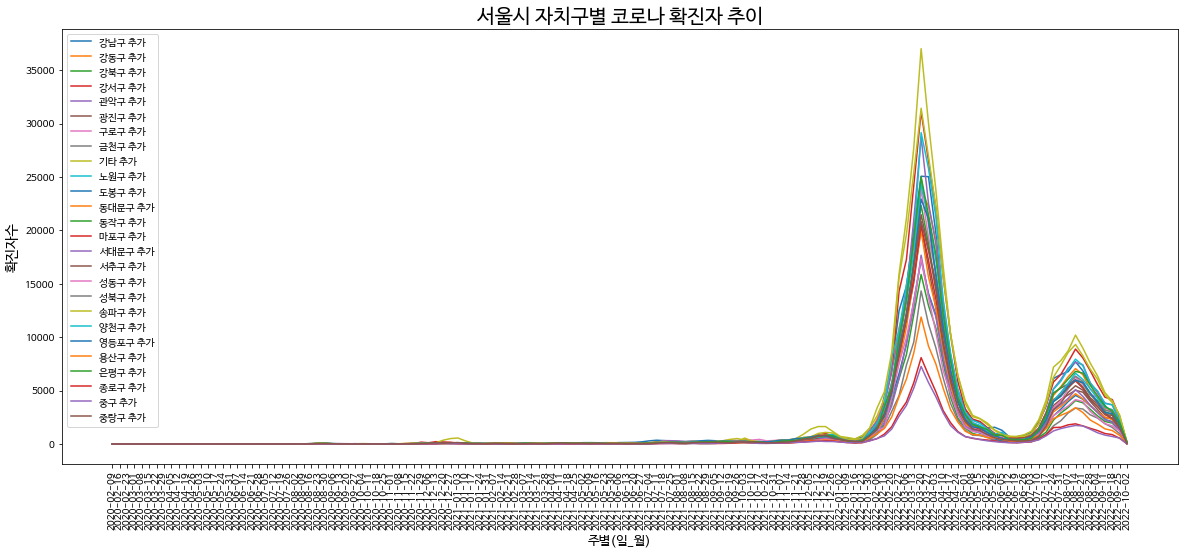

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np

df_raw = pd.read_csv('/서울시 코로나19 자치구별 확진자 발생동향.csv',encoding='cp949')
df_raw.shape
df_raw.columns#칼럼 확인
df=df_raw[['자치구 기준일','종로구 추가','중구 추가','용산구 추가','성동구 추가','광진구 추가','동대문구 추가','중랑구 추가','성북구 추가','강북구 추가','도봉구 추가','노원구 추가','은평구 추가','서대문구 추가','마포구 추가','양천구 추가','강서구 추가','구로구 추가','금천구 추가','영등포구 추가','동작구 추가','관악구 추가','서추구 추가','강남구 추가','송파구 추가','강동구 추가', '기타 추가']]
print(df.shape,df.columns)
df.info()
df['자치구 기준일']=pd.to_datetime(df['자치구 기준일'])     #서울시기준일을 OBJECT에서  datetime으로 바꿈 자료형 변경
df_pivot= df.pivot_table(index='자치구 기준일',values=['종로구 추가','중구 추가','용산구 추가','성동구 추가','광진구 추가','동대문구 추가','중랑구 추가','성북구 추가','강북구 추가','도봉구 추가','노원구 추가','은평구 추가','서대문구 추가','마포구 추가','양천구 추가','강서구 추가','구로구 추가','금천구 추가','영등포구 추가','동작구 추가','관악구 추가','서추구 추가','강남구 추가','송파구 추가','강동구 추가', '기타 추가'])
df_pivot
weekly_covid=df_pivot.resample('W').sum() #일주일씩으로 바꾸기
weekly_covid

plt.rc('font', family='NanumBarunGothic')                                               #한글 안깨지게..
plt.rcParams['axes.unicode_minus'] = False

df_name=weekly_covid.columns

df_name

plt.figure(figsize=(20,8))
for df in df_name:
    plt.plot(weekly_covid[df],label=df)
    plt.legend()
    plt.title('서울시 자치구별 코로나 확진자 추이',fontsize=20)
    plt.xlabel('주별(일_월)',fontsize=13)
    plt.ylabel('확진자수',fontsize=14)
    plt.xticks(weekly_covid.index.to_list(),rotation=90)
    # plt.xlim([738015.7, 738478.3])
    
# x_range, y_range = plt.xlim(), plt.ylim()
# print(x_range, y_range)